In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)  # Loads the dataset and splits it into training (60,000 images) and testing (10,000 images)

(60000, 28, 28) (10000, 28, 28)


In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (60000, 28, 28), Test set shape: (10000, 28, 28)


In [32]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_train_cat, test_size=0.1, random_state=36)

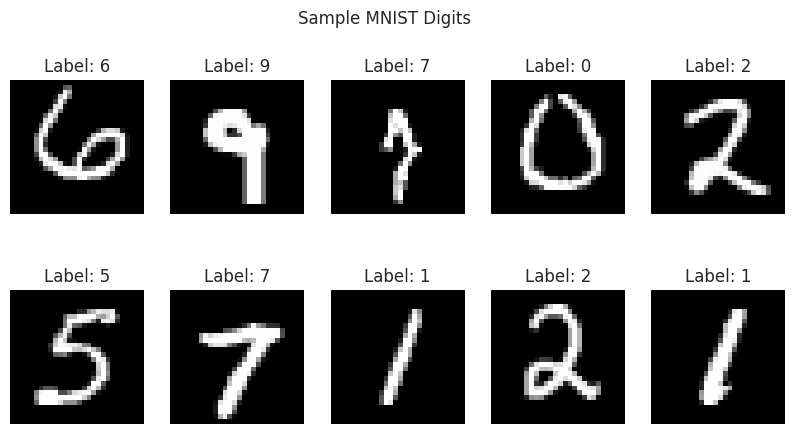

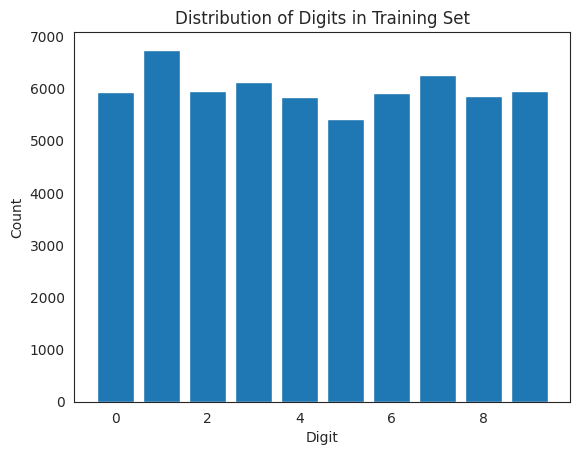

In [34]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train_cat[i])}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [35]:
model_1 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8653 - loss: 0.4722 - val_accuracy: 0.9722 - val_loss: 0.0987
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9769 - loss: 0.0788 - val_accuracy: 0.9792 - val_loss: 0.0731
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9851 - loss: 0.0497 - val_accuracy: 0.9825 - val_loss: 0.0584
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9896 - loss: 0.0350 - val_accuracy: 0.9843 - val_loss: 0.0508
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9926 - loss: 0.0267 - val_accuracy: 0.9847 - val_loss: 0.0549
